In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
import regex as re

from sklearn.model_selection import train_test_split

# 1. Load Data

In [3]:
df = pd.read_csv('../../data/extracted_all.csv' , sep=";", header=0)#,  on_bad_lines='skip')
df

,library,bin,compiller,version,compiler_option,func_class,func_name,name_hash,instructions_count,func_body,func_graph
0,boost,elf,gcc,9.3.0,Ofast,Another,too_dificult_hash,882b78d6d98bb4f4de99034ad925ac78,25,"['movzx eax, byte [0x08000157]', 'test al, al'...",NaN
1,boost,elf,gcc,9.3.0,Ofast,Another,too_dificult_hash,68549277191887274c0eb8a92bd0b502,11,"['mov rax, rdi', 'and rax, 0xfffffffffffffff0'...",NaN
2,boost,elf,gcc,9.3.0,Ofast,Another,too_dificult_hash,7bf03f89208208a257a5bc583304e36f,2,"['mov eax, 0x20000', 'ret']",NaN
3,boost,elf,gcc,9.3.0,Ofast,Another,too_dificult_hash,426739d842828784e6b03d70aa485e5d,2,"['mov eax, 0x800', 'ret']",NaN
4,boost,elf,gcc,9.3.0,Ofast,Another,too_dificult_hash,aac7d823fc1e39ff5be97b1e161979b7,24,"['lea rsp, [rsp - 0x38]', 'stmxcsr dword [rsp]...",NaN
...,...,...,...,...,...,...,...,...,...,...,...
142433,boost,elf,gcc,10.2.1,Ofast,'Data structures',too_dificult_hash,a991b3fc017150fe1e004532c8de34d5,29,"['push r12', 'mov r12, rdi', 'mov edi, 0x40', ...",NaN
142434,boost,elf,gcc,10.2.1,Ofast,'Data structures',too_dificult_hash,5c77ad52dee6efbe669533eadb29827c,41,"['mov rax, qword [rdi + 0x28]', 'cmp qword [rd...",NaN
142435,boost,elf,gcc,10.2.1,Ofast,'Data structures',too_dificult_hash,413b54bd74efb152f0174feec50595fb,10,"['call __cxa_begin_catch', 'mov esi, 0x70', 'm...",NaN
142436,boost,elf,gcc,10.2.1,Ofast,'Data structures',too_dificult_hash,daf91395c5ae927892ce1d2f6b5d8625,2,"['lea rax, [0x08005527]', 'ret']",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142438 entries, 0 to 142437
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   library             142438 non-null  object 
 1   bin                 142438 non-null  object 
 2   compiller           142438 non-null  object 
 3   version             142438 non-null  object 
 4   compiler_option     142438 non-null  object 
 5   func_class          142438 non-null  object 
 6   func_name           142438 non-null  object 
 7   name_hash           142438 non-null  object 
 8   instructions_count  142438 non-null  int64  
 9   func_body           142438 non-null  object 
 10  func_graph          0 non-null       float64
dtypes: float64(1), int64(1), object(9)
memory usage: 12.0+ MB


In [6]:
df_short = df[["compiller","version","compiler_option","func_class","name_hash","instructions_count","func_body"]]
df_short

,compiller,version,compiler_option,func_class,name_hash,instructions_count,func_body
0,gcc,9.3.0,Ofast,Another,882b78d6d98bb4f4de99034ad925ac78,25,"['movzx eax, byte [0x08000157]', 'test al, al'..."
1,gcc,9.3.0,Ofast,Another,68549277191887274c0eb8a92bd0b502,11,"['mov rax, rdi', 'and rax, 0xfffffffffffffff0'..."
2,gcc,9.3.0,Ofast,Another,7bf03f89208208a257a5bc583304e36f,2,"['mov eax, 0x20000', 'ret']"
3,gcc,9.3.0,Ofast,Another,426739d842828784e6b03d70aa485e5d,2,"['mov eax, 0x800', 'ret']"
4,gcc,9.3.0,Ofast,Another,aac7d823fc1e39ff5be97b1e161979b7,24,"['lea rsp, [rsp - 0x38]', 'stmxcsr dword [rsp]..."
...,...,...,...,...,...,...,...
142433,gcc,10.2.1,Ofast,'Data structures',a991b3fc017150fe1e004532c8de34d5,29,"['push r12', 'mov r12, rdi', 'mov edi, 0x40', ..."
142434,gcc,10.2.1,Ofast,'Data structures',5c77ad52dee6efbe669533eadb29827c,41,"['mov rax, qword [rdi + 0x28]', 'cmp qword [rd..."
142435,gcc,10.2.1,Ofast,'Data structures',413b54bd74efb152f0174feec50595fb,10,"['call __cxa_begin_catch', 'mov esi, 0x70', 'm..."
142436,gcc,10.2.1,Ofast,'Data structures',daf91395c5ae927892ce1d2f6b5d8625,2,"['lea rax, [0x08005527]', 'ret']"


In [7]:
df_short.describe(include="all")

,compiller,version,compiler_option,func_class,name_hash,instructions_count,func_body
count,142438,142438,142438,142438,142438,142438.000000,142438
unique,1,2,7,8,10215,NaN,16395
top,gcc,9.3.0,Ofast,System,38f5412e362bb918ec68bb04b3c3e10d,NaN,['ret']
freq,142438,71520,20349,58604,168,NaN,4844
mean,NaN,NaN,NaN,NaN,NaN,86.523470,NaN
std,NaN,NaN,NaN,NaN,NaN,197.780937,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,32.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,88.000000,NaN


In [8]:
names = ['func_class', 'name_hash', "func_body"]
df_short_sub = df_short[ names ]
df_short_sub.duplicated().sum()

124391

In [9]:
df_short.drop_duplicates(subset=names, inplace = True, keep='first')
df_short.shape

/tmp/ipykernel_1557/2073403914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short.drop_duplicates(subset=names, inplace = True, keep='first')


(18047, 7)

In [10]:
df_short

,compiller,version,compiler_option,func_class,name_hash,instructions_count,func_body
0,gcc,9.3.0,Ofast,Another,882b78d6d98bb4f4de99034ad925ac78,25,"['movzx eax, byte [0x08000157]', 'test al, al'..."
1,gcc,9.3.0,Ofast,Another,68549277191887274c0eb8a92bd0b502,11,"['mov rax, rdi', 'and rax, 0xfffffffffffffff0'..."
2,gcc,9.3.0,Ofast,Another,7bf03f89208208a257a5bc583304e36f,2,"['mov eax, 0x20000', 'ret']"
3,gcc,9.3.0,Ofast,Another,426739d842828784e6b03d70aa485e5d,2,"['mov eax, 0x800', 'ret']"
4,gcc,9.3.0,Ofast,Another,aac7d823fc1e39ff5be97b1e161979b7,24,"['lea rsp, [rsp - 0x38]', 'stmxcsr dword [rsp]..."
...,...,...,...,...,...,...,...
50996,gcc,10.2.1,Og,'Data structures',413b54bd74efb152f0174feec50595fb,10,"['call __cxa_begin_catch', 'mov esi, 0x70', 'm..."
50997,gcc,10.2.1,Og,'Data structures',daf91395c5ae927892ce1d2f6b5d8625,2,"['lea rax, [0x08005527]', 'ret']"
50998,gcc,10.2.1,Og,'Data structures',32762569b694892091229b2b2bcccfde,69,"['push rbx', 'mov rbx, rdi', 'mov edi, 0x48', ..."
125699,gcc,9.3.0,O0,'String and text processing',find_address_dispatch_gcc_9,28,"['xor r8d, r8d', 'push rbx', 'mov r9, rdx', 'm..."


# 2. Some graphic explore and data-change

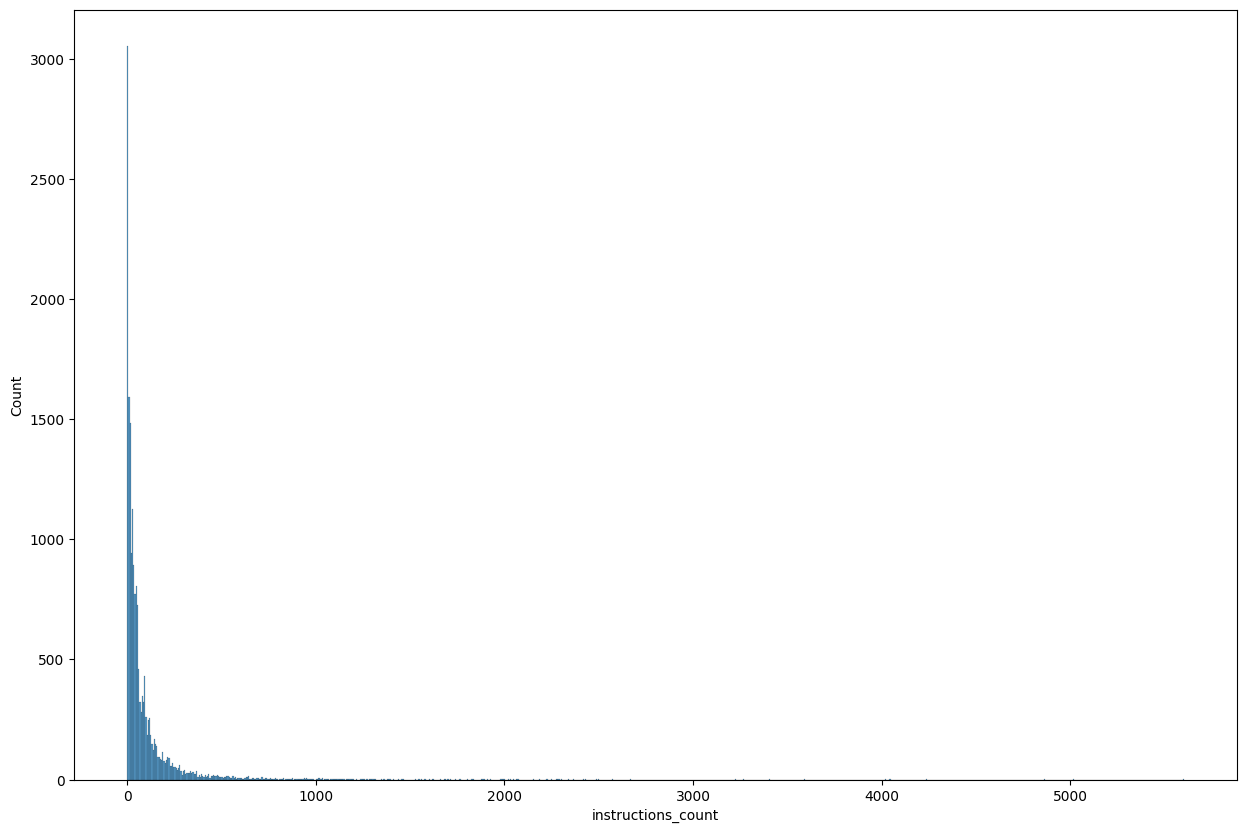

In [32]:
#df_short[df_short.instructions_count < 10]


plt.figure(figsize=(15, 10))
sns.histplot(data=df_short.instructions_count)
plt.show()

<AxesSubplot: xlabel='instructions_count', ylabel='Count'>

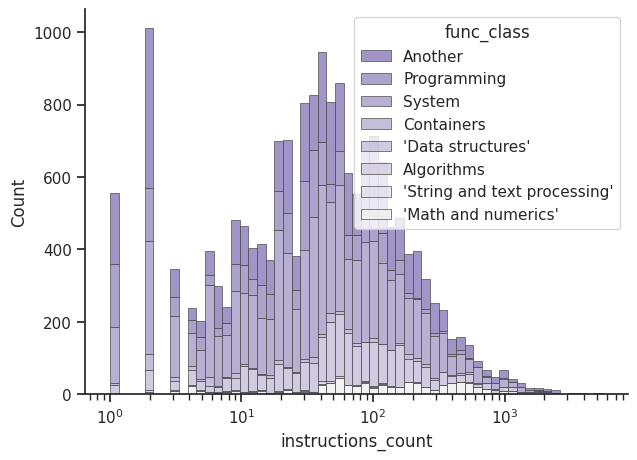

In [44]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df_short,
    x="instructions_count", hue="func_class",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

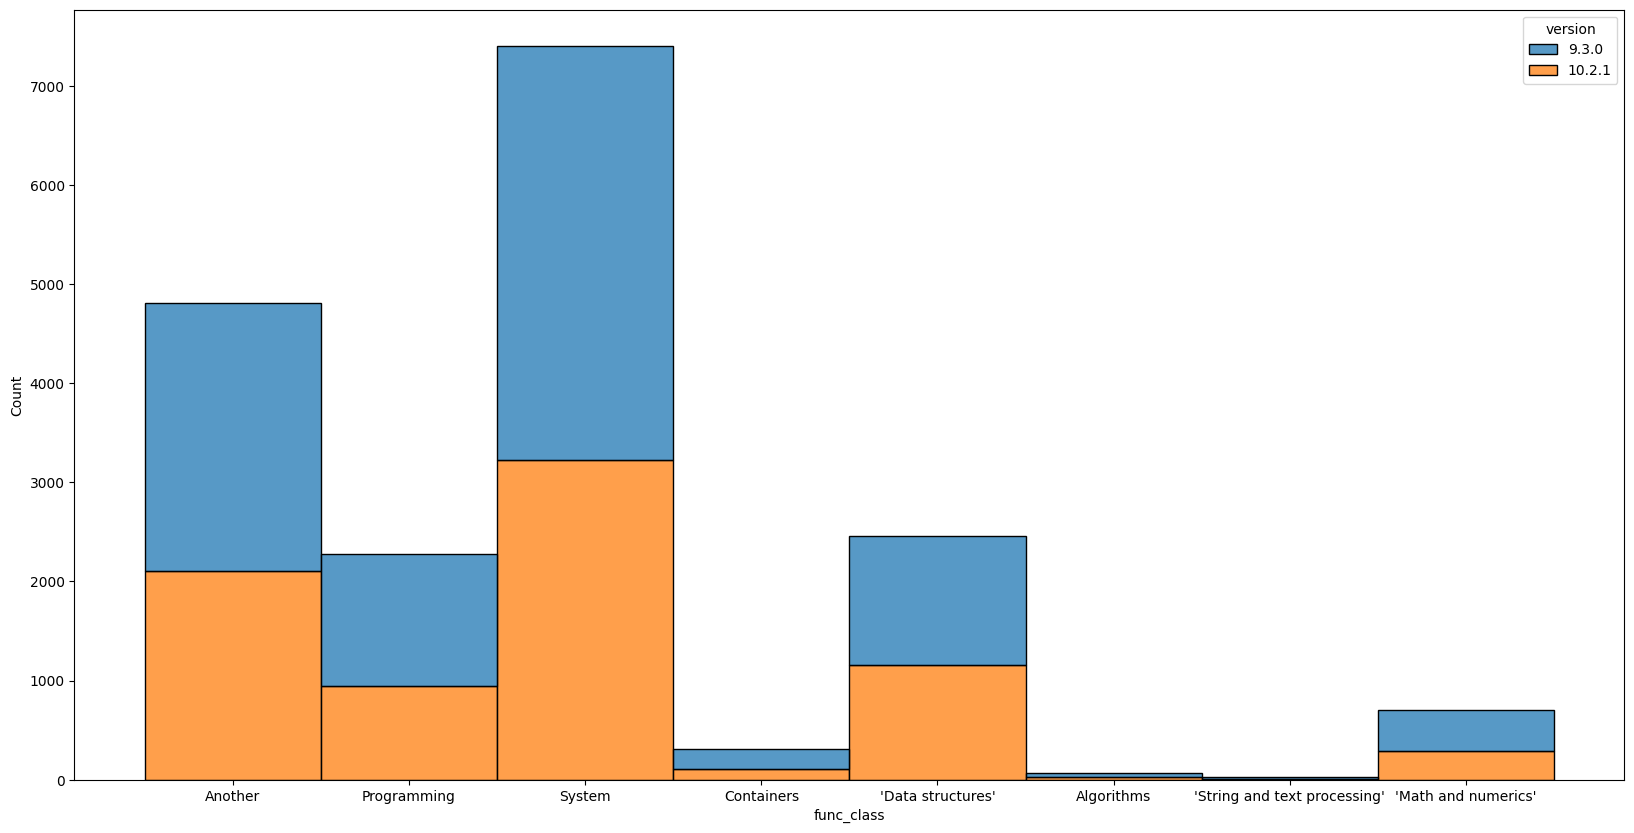

In [27]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df, 
             x=df_short.func_class,  hue=df_short.version, multiple="stack" )
plt.show()

### Наиболее часто используемые конструкции (не уникальные инструкции и регистры!)

In [ ]:
def instruction_count(df):
    asm_instructions_counter = Counter()
    for asm_line in df:
        line_code =  [line.strip().strip("'") for line in str(asm_line).split(',')]
        asm_instructions_counter.update(Counter(line_code))
    return asm_instructions_counter



subset_instructions = df_short.func_body
ct = instruction_count(subset_instructions)
asm_inst_df = pd.DataFrame(ct.most_common(50))
asm_inst_df.columns = ["x", "y"]


In [51]:
len(list(ct)) # количество уникальных инструкций

225230

### Слишком много.

У x86 уникальных инструкций не более 1000 [Habr. Сколько инструкций в x86?](https://habr.com/ru/post/503486/) 
    ![example](./x86instruction.png)

### Наиболее часто используемые конструкции

Text(0.5, 0, 'Times of use')

<Figure size 640x480 with 0 Axes>

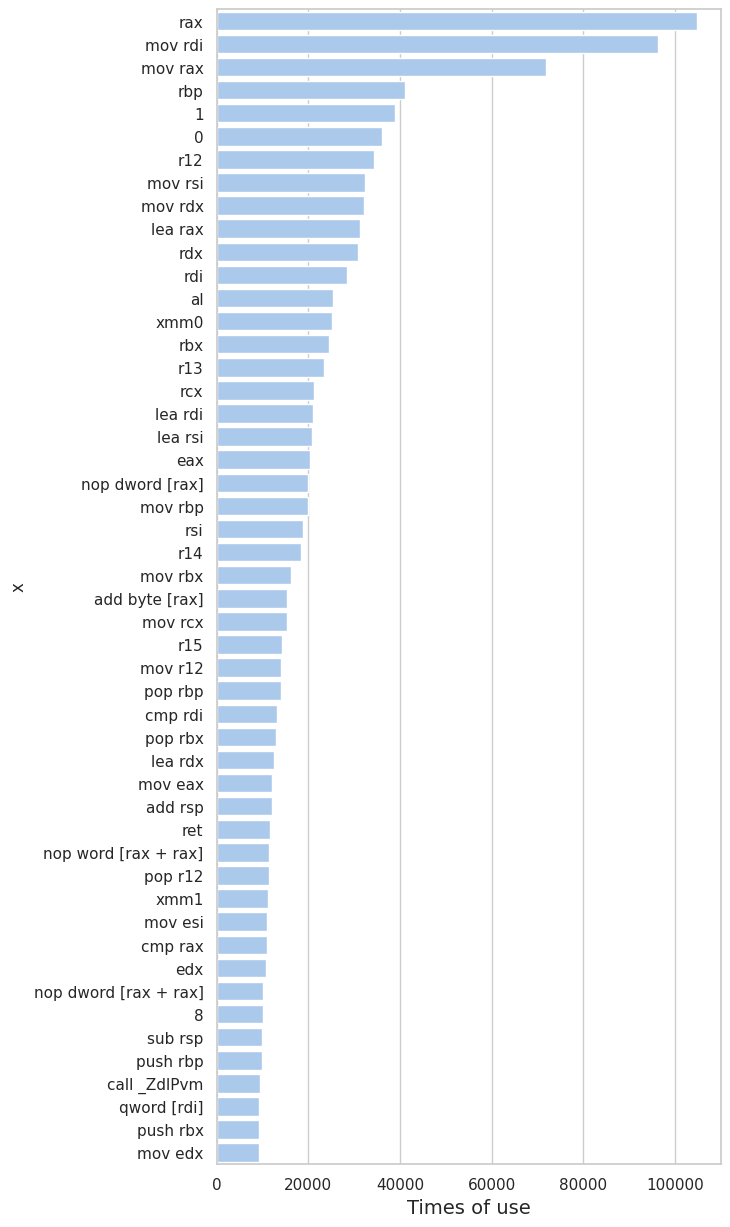

In [49]:
plt.clf()
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 15))
sns.set_color_codes("pastel")
pl = sns.barplot(data=asm_inst_df, x= "y", y = "x",  label="Total", color="b")
pl.set_xlabel("Times of use", fontsize=14)
#pl.set_title('Top-50 most used instructions\n and commands (not precleaned)', fontdict={'fontsize':18}, pad=12)

### Наименее часто используемые конструкции

In [52]:
asm_inst_df2 = pd.DataFrame(ct.most_common()[:-50-1:-1])
asm_inst_df2.columns = ["x", "y"]


Text(0.5, 0, 'Times of use')

<Figure size 640x480 with 0 Axes>

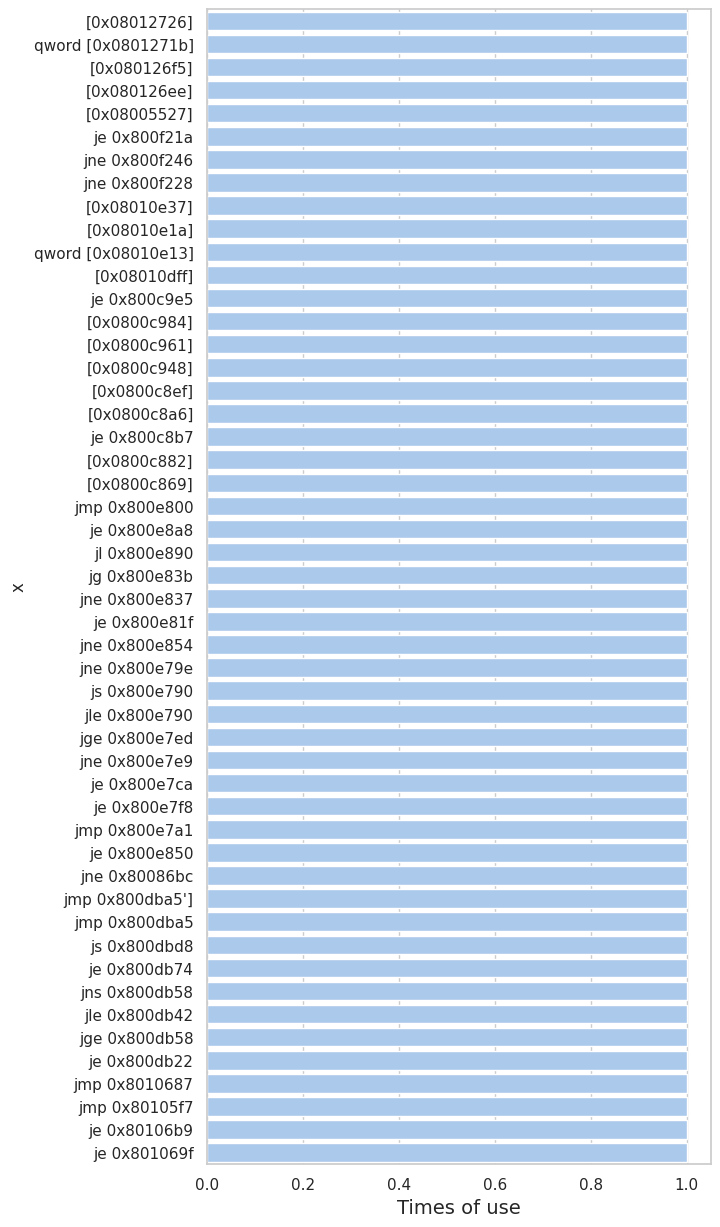

In [53]:
plt.clf()
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 15))
sns.set_color_codes("pastel")
pl = sns.barplot(data=asm_inst_df2, x= "y", y = "x",  label="Total", color="b")
pl.set_xlabel("Times of use", fontsize=14)
#pl.set_title('Top-50 most used instructions\n and commands (not precleaned)', fontdict={'fontsize':18}, pad=12)

In [111]:
bad_values = []
for x, y in ct.items(): 
    if y == 1:
        bad_values.append(x)

print(*bad_values[:200])

mov qword [0x080001b0] stmxcsr dword [rax] fnstcw word [rax + 4] loc.trampoline loc.finish ['lea rsp cmp qword [rax + 0x70] je 0x80015dc je 0x8001624 jne 0x80015dc jmp 0x8001624 jmp 0x8001631'] [0x0800093b] jmp 0x8000bc2 [0x08001a1d] [0x08001a32] [0x08001a6a] jmp 0x8001af0'] je 0x80002c2 mov dword [rbx + 0xc] je 0x8002a73 je 0x8002ba1 jne 0x8002a73 jne 0x8002ab7 jne 0x8002bbd jmp 0x8002a97 [0x08002b55] [0x08002bad] jmp 0x8002a97'] [0x08000d1a] [0x08000d66] je 0x8000dec jmp 0x8000dec'] je 0x8000f2d jne 0x8000ea1 jmp 0x8000f3a'] mov qword [rbx + 0xc] mov qword [rbx + 0x14] jne 0x8002921 [0x08002565] [0x080029f2] jne 0x80029de je 0x8002a25 [0x080015b2] jmp 0x8001602'] call method boost::iostreams::detail::mapped_file_impl::~mapped_file_impl() [clone .cold]'] jne 0x80017ac byte [rsi + 0x15] cmp byte [rsi + 0x14] neg r10d [0x080003f5] push 0x70 dword [rsi + 0xc] call deflateInit2_ ja 0x800043e call inflateInit2_ jmp 0x800040f jne 0x8001328 je 0x8001301 jne 0x80014b7 jne 0x80014bf [0x080013c

### Много адресов. Необходимо все заменить на единую заглушку вида "ADDR"

In [57]:

def addres_replacer(text):
    line = text
    regex = re.compile(r"0x[\dA-Fa-f]*", re.IGNORECASE)
    line = regex.sub("ADDR", line)
    
    regex = re.compile(r"fcn\.[\da-fA-F]*", re.IGNORECASE)
    line = regex.sub("FCN", line)
    
    regex = re.compile(r"(_\w+)", re.IGNORECASE)
    line = regex.sub("FCN", line)
    
    regex = re.compile(r"(?<=method) [\w\W]*", re.IGNORECASE)
    line = regex.sub("METHOD", line)
    
    regex = re.compile(r"(?<=sym) [\w\W]*", re.IGNORECASE)
    line = regex.sub("METHOD", line)
    
    regex = re.compile(r"(?<=call) inflate[\w\W]*", re.IGNORECASE)
    line = regex.sub("inflate", line)
    
    regex = re.compile(r"(?<=call) deflate[\w\W]*", re.IGNORECASE)
    line = regex.sub("deflate", line)
    
    regex = re.compile(r"(?<=[^j])loc\.\.[\w\W]*", re.IGNORECASE)
    line = regex.sub("LOC", line)
    
    regex = re.compile(r"(?<=[^j])\.LC[\w\W]*", re.IGNORECASE)
    line = regex.sub("LOC", line)
    
    
    return line
    
df_short["func_body"] = df_short["func_body"].map(lambda txt: addres_replacer(txt))




/tmp/ipykernel_1557/3455456749.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short["func_body"] = df_short["func_body"].map(lambda txt: addres_replacer(txt))


In [12]:
subset_instructions = df_short.func_body
ct2 = instruction_count(subset_instructions)
asm_inst_df_addr = pd.DataFrame(ct.most_common(50))
asm_inst_df_addr.columns = ["x", "y"]


print("количество уникальных инструкций: было-{} стало - {}".format(len(list(ct)), len(list(ct2)))) # количество уникальных инструкций


#asm_inst_df_addr2 = pd.DataFrame(ct2.most_common()[:-50-1:-1])
#asm_inst_df_addr2.columns = ["x", "y"]


bad_values = []
bad_values2 = []
bad_values3 = []
bad_values4 = []
for x, y in ct2.items(): 
    if y == 1:
        bad_values.append(x)
    if y == 2:
        bad_values2.append(x)
        
    if y == 3:
        bad_values3.append(x)
    if y == 4:
        bad_values4.append(x)
           
# for i in bad_values[:100]:
#     print(i)
print(len(bad_values), len(bad_values2), len(bad_values3), len(bad_values4))


NameError: name 'instruction_count' is not defined

### Много ссылок на функции. Необходимо все заменить на единую заглушку вида "FCN"

fcn.08009f60 fcn.03409f60 fcn.08009a61 fcn.01007fb0

###  Остались ссылки на нераздемангленные имена функций вида 
_ZZN5boost3log12v2s_mt_posix3aux14lazy_singletonINS1_4core14implementationENS_10shared_ptrIS4_EEE12get_instanceEvE8instance

### ...и другие преобразования

In [145]:
df_short["func_body"][1]

"mov rax, rdi', 'and rax, ADDR', 'lea rax, [rax - ADDR]', 'mov qword [rax + ADDR], rdx', 'stmxcsr dword [rax]', 'fnstcw word [rax + 4]', 'lea rcx, loc.trampoline', 'mov qword [rax + ADDR], rcx', 'lea rcx, loc.finish', 'mov qword [rax + ADDR], rcx', 'ret"

## В итоге из почти ***230.000*** получилось ***6.000*** уникальных конструкций (не инструкций)

# 2.2 Feature extraction

In [58]:
def operators_getter(text):
    result = []
    for asm_line in text.split('\''):
        if asm_line.strip() != "," and asm_line.strip() != "[" and asm_line.strip() != "]":
            asm_line = [x for x in asm_line.split(' ')]
            result.append(asm_line[0])
    return ' '.join(result)


def operands_getter(text):
    result = []
    for asm_line in text.split('\''):
        if asm_line.strip() != "," and asm_line.strip() != "[" and asm_line.strip() != "]":
            asm_line = [x.strip(',') for x in asm_line.split(' ')]
            result = [*result, *asm_line[1:]]
    return ' '.join(result)



#df_short["operators"] = df_short["func_body"].map(lambda txt: operators_getter(txt))

df_short["operands"] = df_short["func_body"].map(lambda txt: operands_getter(txt))

/tmp/ipykernel_1557/2715369587.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short["operands"] = df_short["func_body"].map(lambda txt: operands_getter(txt))


In [59]:
df_short

,compiller,version,compiler_option,func_class,name_hash,instructions_count,func_body,func_graph,operands
0,gcc,9.3.0,Ofast,Another,882b78d6d98bb4f4de99034ad925ac78,25,"['movzx eax, byte [ADDR]', 'test al, al', 'je ...","['graph\n', '[\n', 'hierarchic 1\n', 'label """"...",eax byte [ADDR] al al ADDR rax qword [ADDR] dw...
1,gcc,9.3.0,Ofast,Another,68549277191887274c0eb8a92bd0b502,11,"['mov rax, rdi', 'and rax, ADDR', 'lea rax, [r...","['graph\n', '[\n', 'hierarchic 1\n', 'label """"...",rax rdi rax ADDR rax [rax - ADDR] qword [rax +...
2,gcc,9.3.0,Ofast,Another,7bf03f89208208a257a5bc583304e36f,2,"['mov eax, ADDR', 'ret']","['graph\n', '[\n', 'hierarchic 1\n', 'label """"...",eax ADDR
3,gcc,9.3.0,Ofast,Another,426739d842828784e6b03d70aa485e5d,2,"['mov eax, ADDR', 'ret']","['graph\n', '[\n', 'hierarchic 1\n', 'label """"...",eax ADDR
4,gcc,9.3.0,Ofast,Another,aac7d823fc1e39ff5be97b1e161979b7,24,"['lea rsp, [rsp - ADDR]', 'stmxcsr dword [rsp]...","['graph\n', '[\n', 'hierarchic 1\n', 'label """"...",rsp [rsp - ADDR] dword [rsp] word [rsp + 4] qw...
...,...,...,...,...,...,...,...,...,...
50996,gcc,10.2.1,Og,'Data structures',413b54bd74efb152f0174feec50595fb,10,"['call FCN', 'mov esi, ADDR', 'mov rdi, rbp', ...","['graph\n', '[\n', 'hierarchic 1\n', 'label """"...",FCN esi ADDR rdi rbp FCN FCN rbp rax FCN rdi r...
50997,gcc,10.2.1,Og,'Data structures',daf91395c5ae927892ce1d2f6b5d8625,2,"['lea rax, [ADDR]', 'ret']","['graph\n', '[\n', 'hierarchic 1\n', 'label """"...",rax [ADDR]
50998,gcc,10.2.1,Og,'Data structures',32762569b694892091229b2b2bcccfde,69,"['push rbx', 'mov rbx, rdi', 'mov edi, ADDR', ...","['graph\n', '[\n', 'hierarchic 1\n', 'label """"...",rbx rbx rdi edi ADDR FCN xmm1 xmmword [rbx + 8...
125699,gcc,9.3.0,O0,'String and text processing',find_address_dispatch_gcc_9,28,"['xor r8d, r8d', 'push rbx', 'mov r9, rdx', 'm...",NaN,r8d r8d rbx r9 rdx eax r8d ebx r8d ecx r8d edx...


# 2.2 Work with graph

In [55]:
import igraph

In [56]:
df = pd.read_csv('../../data/extracted_with_graph.csv' , sep=";", header=0)#,  on_bad_lines='skip')
df_short = df[["compiller","version","compiler_option","func_class","name_hash","instructions_count","func_body", "func_graph"]]
df_short.drop_duplicates(subset=names, inplace = True, keep='first')


/tmp/ipykernel_1557/3559183835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short.drop_duplicates(subset=names, inplace = True, keep='first')


<AxesSubplot: >

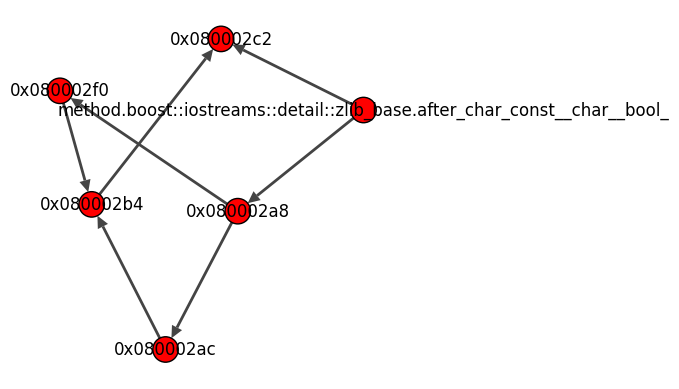

In [161]:
import matplotlib.pyplot as plt

text = ' '.join(df_short.func_graph[19].split(","))[1:-1]
text = text.replace(r"\n", "\n")
text = text.replace('\'', '') 




layout = g.layout("kk")
with open("/tmp/gml.gml", "a") as bibfile:
    for line in text:
        bibfile.writelines(line)
g = igraph.read("/tmp/gml.gml")
open('/tmp/gml.gml', 'w').close()



fig, ax = plt.subplots()
igraph.plot(g, layout=layout, target=ax)

In [154]:
text = ' '.join(df_short.func_graph[19].split(","))[1:-1]
text = text.replace(r"\n", "\n")
text = text.replace('\'', '') 
                   
                    
with open("/tmp/gml.gml", "a") as bibfile:
    for line in text:
        bibfile.writelines(line)
g = igraph.read("/tmp/gml.gml")
open('/tmp/gml.gml', 'w').close()


#g = igraph.read("../../raw_data/boost/gcc_9.3.0_O0/atomic/0a4955170a1f265bb651815b1e45f80a.gml")

#print(*g.get_adjacency())
print(g.vcount())
#print(g.incident(0))
print(g.degree(0))
print(g.diameter())
print(g.girth())
print(g.radius())
print(g.average_path_length())
print(g.transitivity_avglocal_undirected())
#print(g.laplacian())

6
2
3
4
0
1.6428571428571428
0.0


In [174]:
def vcount_getter(text):
    try:
        text = ' '.join(text.split(","))[1:-1]
        text = text.replace(r"\n", "\n")
        text = text.replace('\'', '') 
        with open("/tmp/gml.gml", "a") as bibfile:
            for line in text:
                bibfile.writelines(line)
            g = igraph.read("/tmp/gml.gml")
    except:
        open('/tmp/gml.gml', 'w').close()
        return 0
    open('/tmp/gml.gml', 'w').close()
    return g.vcount()


def degree_getter(text):
    try:
        text = ' '.join(text.split(","))[1:-1]
        text = text.replace(r"\n", "\n")
        text = text.replace('\'', '') 
        with open("/tmp/gml.gml", "a") as bibfile:
            for line in text:
                bibfile.writelines(line)
            g = igraph.read("/tmp/gml.gml")
    except:
        open('/tmp/gml.gml', 'w').close()
        return 0
    open('/tmp/gml.gml', 'w').close()
    return g.degree(0)



def diameter_getter(text):
    try:
        text = ' '.join(text.split(","))[1:-1]
        text = text.replace(r"\n", "\n")
        text = text.replace('\'', '') 
        with open("/tmp/gml.gml", "a") as bibfile:
            for line in text:
                bibfile.writelines(line)
            g = igraph.read("/tmp/gml.gml")
    except:
        open('/tmp/gml.gml', 'w').close()
        return 0
    open('/tmp/gml.gml', 'w').close()
    return g.diameter()


def girth_getter(text):
    try:
        text = ' '.join(text.split(","))[1:-1]
        text = text.replace(r"\n", "\n")
        text = text.replace('\'', '') 
        with open("/tmp/gml.gml", "a") as bibfile:
            for line in text:
                bibfile.writelines(line)
            g = igraph.read("/tmp/gml.gml")
    except:
        open('/tmp/gml.gml', 'w').close()
        return 0
    open('/tmp/gml.gml', 'w').close()
    return g.girth()


def radius_getter(text):
    try:
        text = ' '.join(text.split(","))[1:-1]
        text = text.replace(r"\n", "\n")
        text = text.replace('\'', '') 
        with open("/tmp/gml.gml", "a") as bibfile:
            for line in text:
                bibfile.writelines(line)
            g = igraph.read("/tmp/gml.gml")
    except:
        open('/tmp/gml.gml', 'w').close()
        return 0
    open('/tmp/gml.gml', 'w').close()
    return g.radius()


def average_path_length_getter(text):
    try:
        text = ' '.join(text.split(","))[1:-1]
        text = text.replace(r"\n", "\n")
        text = text.replace('\'', '') 
        with open("/tmp/gml.gml", "a") as bibfile:
            for line in text:
                bibfile.writelines(line)
            g = igraph.read("/tmp/gml.gml")
    except:
        open('/tmp/gml.gml', 'w').close()
        return 0
    open('/tmp/gml.gml', 'w').close()
    return g.average_path_length()

def transitivity_avglocal_undirected_getter(text):
    try:
        text = ' '.join(text.split(","))[1:-1]
        text = text.replace(r"\n", "\n")
        text = text.replace('\'', '') 
        with open("/tmp/gml.gml", "a") as bibfile:
            for line in text:
                bibfile.writelines(line)
            g = igraph.read("/tmp/gml.gml")
    except:
        open('/tmp/gml.gml', 'w').close()
        return 0
    open('/tmp/gml.gml', 'w').close()
    return g.transitivity_avglocal_undirected()





df_short["vcount"] = df_short["func_graph"].map(lambda txt: vcount_getter(txt))
df_short["degree"] = df_short["func_graph"].map(lambda txt: degree_getter(txt))
df_short["diameter"] = df_short["func_graph"].map(lambda txt: diameter_getter(txt))
df_short["girth"] = df_short["func_graph"].map(lambda txt: girth_getter(txt))
df_short["radius"] = df_short["func_graph"].map(lambda txt: radius_getter(txt))
df_short["average_path_length"] = df_short["func_graph"].map(lambda txt: average_path_length_getter(txt))
df_short["transitivity_avglocal_undirected"] = df_short["func_graph"].map(lambda txt: transitivity_avglocal_undirected_getter(txt))

/tmp/ipykernel_1557/2409736239.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short["vcount"] = df_short["func_graph"].map(lambda txt: vcount_getter(txt))
/tmp/ipykernel_1557/2409736239.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short["degree"] = df_short["func_graph"].map(lambda txt: degree_getter(txt))
/tmp/ipykernel_1557/2409736239.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [173]:
open('/tmp/gml.gml', 'w').close()
vcount_getter(df_short.func_graph[19])


6

# 3. Dividing data to train, test and control

In [53]:
train_size=0.8

X = df_short.drop(columns = ['func_class']).copy()
y = df_short['func_class']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)



print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)



df_train = pd.concat((X_train, y_train), axis=1)
df_test = pd.concat((X_test, y_test), axis=1)

print(df_train.shape)
print(df_test.shape)

(14437, 8)
(14437,)
(3610, 8)
(3610,)
(14437, 9)
(3610, 9)


In [54]:
df_train.to_csv('../../data/for_linear_models/train_feature.csv', index=False)
df_test.to_csv('../../data/for_linear_models/test_feature.csv', index=False)

# TODO stratify....

## To be continue....